# RMSD statistics

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def analyze_rmsd(filename):
    """
    Analyze RMSD values from a PyTorch file and generate statistics and visualization.
    
    Args:
        filename (str): Path to the .pt file containing RMSD data
    """
    # Load data from file
    data_list = torch.load(filename)
    rmsd_list = []
    
    # Extract RMSD values
    for data in data_list:
        rmsd_list.extend(data["rmsd_noneq"].tolist())

    print(f"Total RMSD values: {len(rmsd_list)}")
    print(f"RMSD range: {min(rmsd_list):.4f} - {max(rmsd_list):.4f}")

    # Convert to numpy array for easier statistics calculation
    rmsd_array = np.array(rmsd_list)

    # Calculate statistics
    mean_rmsd = np.mean(rmsd_array)
    q1 = np.percentile(rmsd_array, 25)  # Q1 (25th percentile)
    q2 = np.percentile(rmsd_array, 50)  # Q2 (median, 50th percentile)
    q3 = np.percentile(rmsd_array, 75)  # Q3 (75th percentile)
    q4 = np.percentile(rmsd_array, 100)  # Q4 (maximum, 100th percentile)

    # Print statistics
    print("\n=== RMSD Statistics ===")
    print(f"Mean: {mean_rmsd:.4f}")
    print(f"Q1 (25th percentile): {q1:.4f}")
    print(f"Q2 (50th percentile/Median): {q2:.4f}")
    print(f"Q3 (75th percentile): {q3:.4f}")
    print(f"Q4 (100th percentile/Max): {q4:.4f}")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(rmsd_list, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(mean_rmsd, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rmsd:.4f}')
    plt.axvline(q2, color='green', linestyle='--', linewidth=2, label=f'Median: {q2:.4f}')
    plt.axvline(q1, color='orange', linestyle=':', linewidth=1.5, label=f'Q1: {q1:.4f}')
    plt.axvline(q3, color='orange', linestyle=':', linewidth=1.5, label=f'Q3: {q3:.4f}')

    plt.xlabel('RMSD')
    plt.ylabel('Frequency')
    plt.title('RMSD Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Additional statistics
    print(f"\nStandard deviation: {np.std(rmsd_array):.4f}")
    print(f"IQR (Q3-Q1): {q3-q1:.4f}")
    print(f"Min: {np.min(rmsd_array):.4f}")
    print(f"Max: {np.max(rmsd_array):.4f}")
    
    return rmsd_array

Total RMSD values: 6815
RMSD range: 0.0731 - 1.2016

=== RMSD Statistics ===
Mean: 0.3788
Q1 (25th percentile): 0.2256
Q2 (50th percentile/Median): 0.3406
Q3 (75th percentile): 0.4948
Q4 (100th percentile/Max): 1.2016


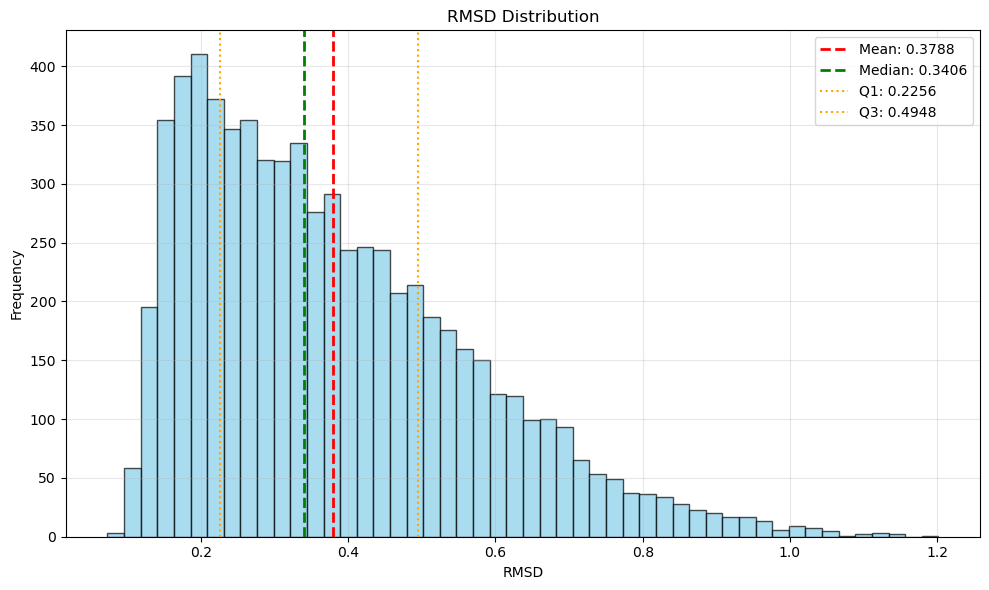


Standard deviation: 0.1887
IQR (Q3-Q1): 0.2692
Min: 0.0731
Max: 1.2016


In [2]:
rmsd_data = analyze_rmsd("test.random.pt")

Total RMSD values: 6815
RMSD range: 0.0484 - 0.2304

=== RMSD Statistics ===
Mean: 0.1319
Q1 (25th percentile): 0.1203
Q2 (50th percentile/Median): 0.1321
Q3 (75th percentile): 0.1447
Q4 (100th percentile/Max): 0.2304


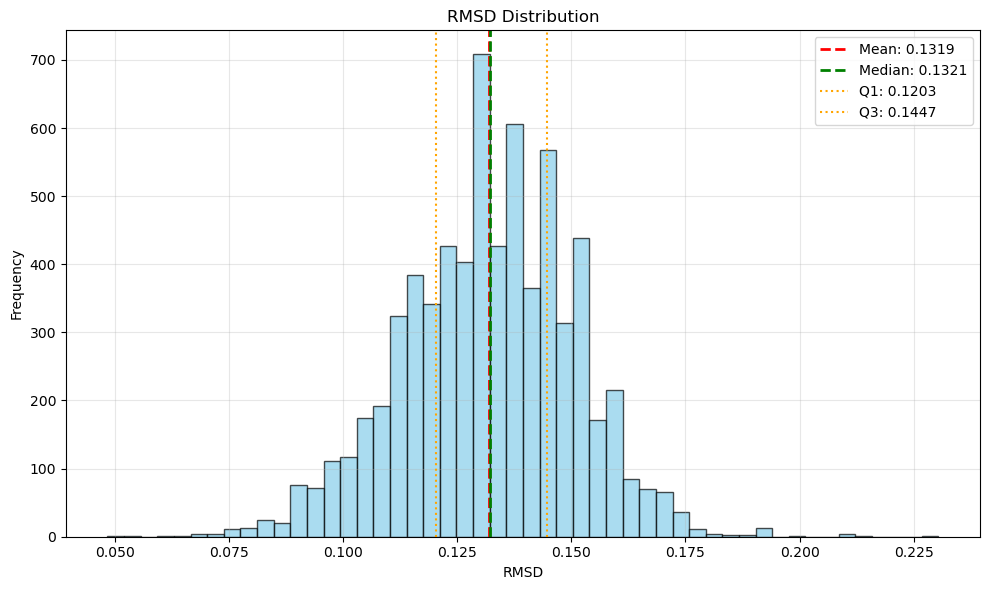


Standard deviation: 0.0187
IQR (Q3-Q1): 0.0244
Min: 0.0484
Max: 0.2304


In [3]:
rmsd_data = analyze_rmsd("test.smallest.pt")

Total RMSD values: 6815
RMSD range: 0.1868 - 0.5009

=== RMSD Statistics ===
Mean: 0.3430
Q1 (25th percentile): 0.3176
Q2 (50th percentile/Median): 0.3451
Q3 (75th percentile): 0.3703
Q4 (100th percentile/Max): 0.5009


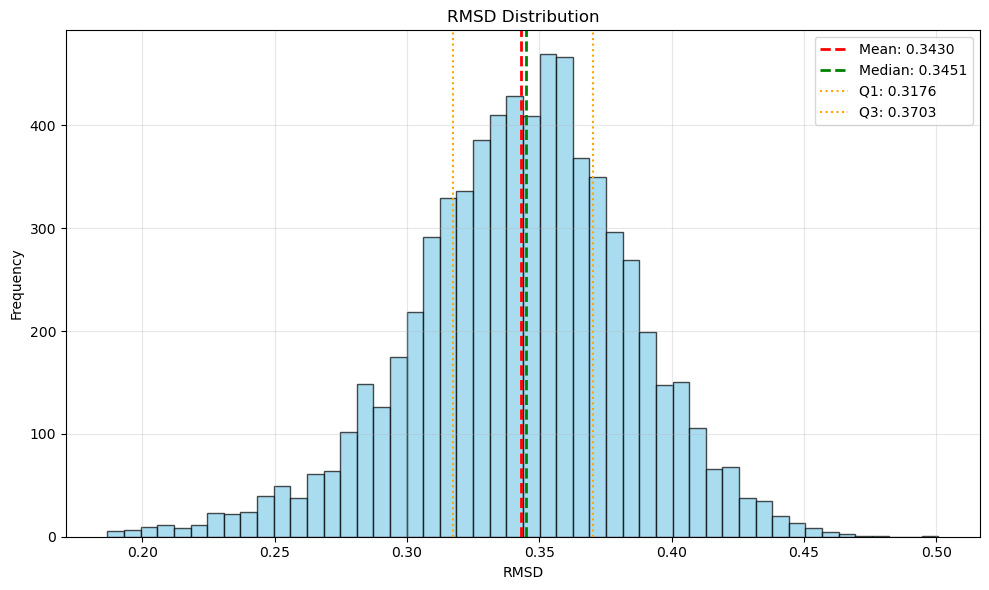


Standard deviation: 0.0415
IQR (Q3-Q1): 0.0527
Min: 0.1868
Max: 0.5009


In [4]:
rmsd_data = analyze_rmsd("test.median.pt")

Total RMSD values: 6815
RMSD range: 0.4094 - 1.3491

=== RMSD Statistics ===
Mean: 0.8981
Q1 (25th percentile): 0.8175
Q2 (50th percentile/Median): 0.8933
Q3 (75th percentile): 0.9746
Q4 (100th percentile/Max): 1.3491


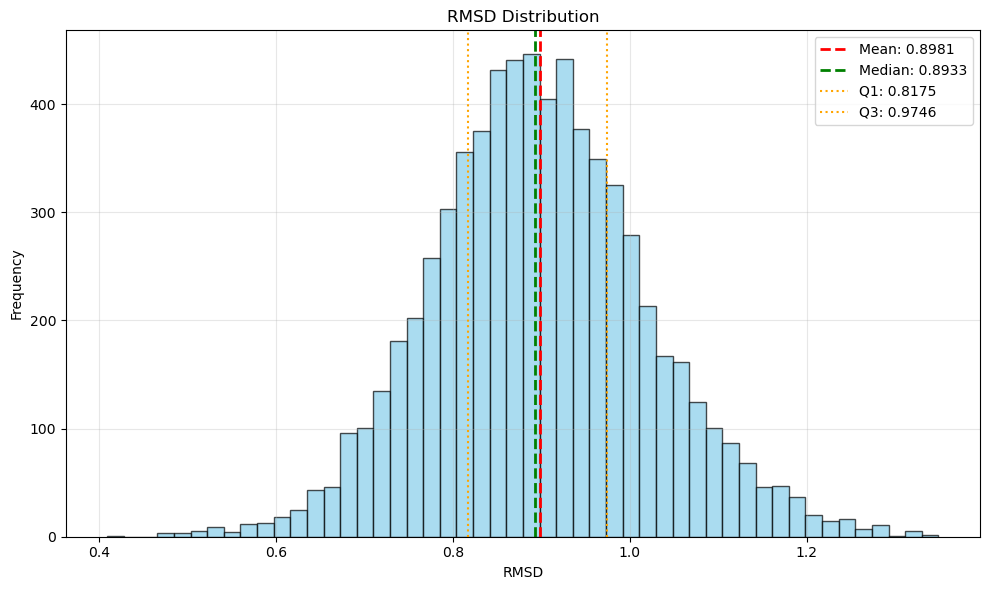


Standard deviation: 0.1224
IQR (Q3-Q1): 0.1571
Min: 0.4094
Max: 1.3491


In [5]:
rmsd_data = analyze_rmsd("test.largest.pt")